# CSE527 Homework 4 Part 1 (40 points)
**Due date: 11:59 pm EST on Dec 17, 2023**

In this semester, we will use Google Colab for the assignments, which allows us to utilize resources that some of us might not have in their local machines such as GPUs. You will need to use your Stony Brook (*.stonybrook.edu) account for coding and Google Drive to save your results.

## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

Settings used for assignments: ***Edit -> Notebook Settings -> Runtime Type (Python 3)***.
---

## Tracking algorithm description

This assignment is based on SiamFC [1] Tracking. The basic idea of [1] is to learn a similarity measurement between target and search space using deep Siamese network. With the learned similarity measurement, both target localization and target scale estimation will be performed on it. In addition, no model update is performed during tracking. **More details can be found in the original paper [1].**

## Your task

In this assignment, you will find two problems.
1. The first one is a standard SiamFC based tracking algorithm. It will be given with several parts incompleted (e.g., the function loading sequence for tracking). You need to complete these parts and make the full tracking algorithm work.  (20 points)
2. Second one is based on RGB-Thermal Tracking. In this tracking problem, you will additionally have a Thermal channel alongside the RGB(visible spectrum) image in the video sequences. You need to use this additional information to your advantage to aid the tracking. Again, few missing sections of the code have to be completed here.   (20 points)


The incompleted parts will be like this:

  \# description of requirement for this part

  \#------------- WRITE YOUR OWN CODE -------------\#

  ...

  \#------------- END OF YOUR OWN CODE-------------\#

**NOTE: the pretrained SiamFC model is given, and you just need to use the pretrained model to finish the tracking algorithm.**


[1] Fully-Convolutional Siamese Networks for Object Tracking, ECCVW, 2016.



#Environment set up and data preparation



1.   **Install PyTorch 1.1.0 and Pillow 6.0.0.**

  Please install PyTorch 1.1.0 using the following command (By default, latest version of PyTorch is installed on CoLab. Here, we want to use an old version). In addition, you also need to downgrade the Pillow to verion 6.0.0.
  
  **After finishing, remember to restart runtime, otherwise you may get errors.**




In [ ]:
# install pytorch
# run only if you are using local
# !pip install torch===1.1.0 torchvision==0.4.0 -f https://download.pytorch.org/whl/torch_stable.html

# downgrade pillow
!pip install pillow==6.0.0

# after executing the above commands, remember to restart runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 56.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pillow: filename=Pillow-6.0.0-cp310-cp310-linux_x86_64.whl size=1032182 sha256=987102714ba9eb671e52609b81b08c880d433e525b718f717aff182604c53a1d
  Stored in directory: /root/.cache/pip/wheels/05/2d/34/22af8fec39a02034b6325a59e10cc5ca56998d697b03bf8270
Successfully built pillow
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 3.3.1 requires pillow>=7.1.0, but you have pillow 6.0.0 which is incompatible.
dopamine-rl 4.0.6 requires Pillow>=7.0.0, but you have pillow 6.0.0 which is incompatible.
fastai 2.7.13 requires pillow>=9.0.0, but you have pillow 6.0.0 which is incom

In [30]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/CSE527/Wen_Shihao_113085521_hw4/part1

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/CSE527/Wen_Shihao_113085521_hw4/part1


2.   **Download data and model**

Now lets pull the data into your project root.  
If you are using Google colab, you can simply open each below link and click the "Add to Drive" Icon on the top-right corner of website to add it's shortcut to your current project root.  

link for data:
  1.  SiamFCVideo: https://drive.google.com/file/d/1p3TqVd62KQpL6uRnzuaO1wI_9ggpUUd-/view?usp=sharing
  2. RGBT-234: https://drive.google.com/file/d/10lIlhq15W0EuspAk-s-u5JNei1UyEJ-s/view?usp=drive_link   

link for model:  
  3. SiamFCMModel.pth: https://drive.google.com/file/d/1VJUutw8vQaoTCuRUy5qwyX8oqejS-D8f/view?usp=drive_link

Download and unzip them into PROJ_ROOT/hw4/part1/



3. **Unzip the video sequence using the following commands.**

In [ ]:
# unzip video data from the zip file
!unzip SiamFCVideo.zip
!unzip RGB-T234.zip

Archive:  SiamFCVideo.zip
  inflating: SiamFCVideo/groundtruth_rect.txt  
  inflating: SiamFCVideo/img/0397.jpg  
  inflating: SiamFCVideo/img/0303.jpg  
  inflating: SiamFCVideo/img/0105.jpg  
  inflating: SiamFCVideo/img/0408.jpg  
  inflating: SiamFCVideo/img/0460.jpg  
  inflating: SiamFCVideo/img/0113.jpg  
  inflating: SiamFCVideo/img/0264.jpg  
  inflating: SiamFCVideo/img/0282.jpg  
  inflating: SiamFCVideo/img/0068.jpg  
  inflating: SiamFCVideo/img/0427.jpg  
  inflating: SiamFCVideo/img/0140.jpg  
  inflating: SiamFCVideo/img/0389.jpg  
  inflating: SiamFCVideo/img/0141.jpg  
  inflating: SiamFCVideo/img/0094.jpg  
  inflating: SiamFCVideo/img/0435.jpg  
  inflating: SiamFCVideo/img/0114.jpg  
  inflating: SiamFCVideo/img/0263.jpg  
  inflating: SiamFCVideo/img/0281.jpg  
  inflating: SiamFCVideo/img/0426.jpg  
  inflating: SiamFCVideo/img/0076.jpg  
  inflating: SiamFCVideo/img/0272.jpg  
  inflating: SiamFCVideo/img/0265.jpg  
  inflating: SiamFCVideo/img/0500.jpg  
  infl

In [ ]:
# check if successfully uploading the files
# should show: Config.py, SiamFCModel.pth, SiamFCVideo, SiamFCVideo.zip, RGB-T234, RGB-T234.zip, SiamNet.py
!ls

Config.py		 RGB-T234      SiamFCMModel.pth  SiamFCVideo.zip
CSE527_23F_HW4_P1.ipynb  RGB-T234.zip  SiamFCVideo	 SiamNet.py


# Problem 1: SiamFC Tracking Algorithm

(25 points) **Some important instructions:**


*   After finishing preparing the data, it is better to check each of them;
*   The network of SiamFC is defined in *SiamNet.py*, and you can check it to get familar with the architecture of SiamFC;
*   There are some parameters defined in the Config.py, and you need to know some of them for coordinate transformation;


**NOTE 1: before starting the implementation try to read what existing methods are trying to acheive, so you know how to use them.**

**NOTE 2: before running the code, please change runtime type to GPU**

**NOTE 3: There are many available resources about SiamFC online, and you should finish this assignment on your own. Do NOT copy-and-paste!!!**

In [32]:
# Code for SiamFC tracking algorithm
import torchvision.transforms.functional as F
import cv2
from torch.autograd import Variable
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import glob
from Config import *
from IPython.display import clear_output
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def load_sequence(seq_path):
    """
    load sequences;
    sequences should be in OTB format, or you can custom this function by yourself
    """
    # given the sequence path, you need to load sequence information, including
    # img_list: a list, each element of which is the path for an image
    # target_position: an array, the center position of the target [center_y, center_x]
    # target_sz: an array, the height and width of the target [h, w]
    # NOTE: the sequence folder contains a sub-folder that contains all image files,
    # and a 'groundtruth_rect.txt' that contains the initial groundtruth of the target in format (top_left_x, top_left_y, width, height)

    ##########--WRITE YOUR CODE HERE --##########

    img_list = sorted(glob.glob(os.path.join(seq_path, 'img/*.jpg')))
    groundtruth_rect = np.genfromtxt(os.path.join(seq_path, 'groundtruth_rect.txt'), delimiter=',', dtype=np.float32)
    target_position = np.array([groundtruth_rect[1] + groundtruth_rect[3] / 2, groundtruth_rect[0] + groundtruth_rect[2] / 2])
    target_sz = np.array([groundtruth_rect[3], groundtruth_rect[2]])

    ##########-------END OF CODE-------##########

    return img_list, target_position, target_sz


def visualize_tracking_result(img, bbox, fig_n):
    """
    visualize tracking result
    """
    fig = plt.figure(fig_n)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    r = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth = 3, edgecolor = "#00ff00", zorder = 1, fill = False)
    ax.imshow(img)
    ax.add_patch(r)
    plt.ion()
    plt.show()
    plt.pause(0.00001)
    plt.clf()


def get_subwindow_tracking(im, pos, model_sz, original_sz, avg_chans):
    """
    extract image crop
    """
    # im: input image
    # pos: [center_y, center_x] of the position around which image has to be cropped
    # model_sz: size to which the cropped portion has to be rescaled before return
    # original_sz: size of the patch to be cropped from the original image
    # avg_channels: a 3 sized array indicating avg intensities of pixels in RGB. This
    # color is used for padding areas

    if original_sz is None:
        original_sz = model_sz

    sz = original_sz
    im_sz = im.shape
    # make sure the size is not too small
    assert (im_sz[0] > 2) & (im_sz[1] > 2), "The size of image is too small!"
    c = (sz+1) / 2

    # check out-of-bounds coordinates, and set them to black
    context_xmin = round(pos[1] - c)       # floor(pos(2) - sz(2) / 2);
    context_xmax = context_xmin + sz - 1
    context_ymin = round(pos[0] - c)       # floor(pos(1) - sz(1) / 2);
    context_ymax = context_ymin + sz - 1

    # compute padding
    left_pad = max(0, 1-context_xmin)       # in python, index starts from 0
    top_pad = max(0, 1-context_ymin)
    right_pad = max(0, context_xmax - im_sz[1])
    bottom_pad = max(0, context_ymax - im_sz[0])

    context_xmin = context_xmin + left_pad
    context_xmax = context_xmax + left_pad
    context_ymin = context_ymin + top_pad
    context_ymax = context_ymax + top_pad

    im_R = im[:, :, 0]
    im_G = im[:, :, 1]
    im_B = im[:, :, 2]

    # padding
    if (top_pad !=0) | (bottom_pad !=0) | (left_pad !=0) | (right_pad !=0):
        im_R = np.pad(im_R, ((int(top_pad), int(bottom_pad)), (int(left_pad), int(right_pad))), 'constant', constant_values = avg_chans[0])
        im_G = np.pad(im_G, ((int(top_pad), int(bottom_pad)), (int(left_pad), int(right_pad))), 'constant', constant_values = avg_chans[1])
        im_B = np.pad(im_B, ((int(top_pad), int(bottom_pad)), (int(left_pad), int(right_pad))), 'constant', constant_values = avg_chans[2])

        im = np.concatenate([im_R[...,np.newaxis], im_G[...,np.newaxis], im_B[...,np.newaxis]], axis=2, dtype=np.double)

    im_patch_original = im[int(context_ymin)-1:int(context_ymax), int(context_xmin)-1:int(context_xmax), :]

    # resize to the 'model_sz'
    if model_sz != original_sz:
        im_patch = cv2.resize(im_patch_original, (int(model_sz), int(model_sz)), interpolation = cv2.INTER_CUBIC)
    else:
        im_patch = im_patch_original

    return im_patch


def make_scale_pyramid(im, target_position, in_side_scaled, out_side, avg_chans, p):
    """
    extract multi-scale image crops
    Used for extracting different scales of area of interest from the search image
    """
    # im: image
    # target_position: center of the area of interest
    # in_side_scaled: The lengths of the sides of 'area of interest' squares at differnt scales
    # out_side: The resolution (of a side) of each pyramid level
    # avg_chans: a 3 sized array indicating avg intensities of pixels in RGB. This
    # color is used for padding areas
    # p: config

    in_side_scaled = np.round(in_side_scaled)
    pyramid = np.zeros((out_side, out_side, 3, p.num_scale), dtype = np.double)
    max_target_side = in_side_scaled[in_side_scaled.size-1]
    min_target_side = in_side_scaled[0]
    beta = out_side / min_target_side
    # size_in_search_area = beta * size_in_image
    # e.g. out_side = beta * min_target_side
    search_side = round(beta * max_target_side)

    search_region = get_subwindow_tracking(im, target_position, search_side, max_target_side, avg_chans)

    assert (round(beta * min_target_side) == out_side), "Error!"

    # extract multiple pyramid patches using get_subwindow_tracking() function;
    # you should use a loop to do this;
    # the number of scales is indicated by p.num_scale;
    # the scale information is stored in in_side_scaled[];
    # the obtained pryamid is represented in variable 'pyramid';

    ##########--WRITE YOUR CODE HERE --##########

    for s in range(p.num_scale):
        target_side_scaled = round(beta * in_side_scaled[s])
        search_side_scaled = round(beta * max_target_side)
        center_coords = (int((search_side_scaled + 1) / 2), int((search_side_scaled + 1) / 2))

        pyramid[:, :, :, s] = get_subwindow_tracking(search_region, center_coords, out_side, target_side_scaled, avg_chans)
    ##########-------END OF CODE-------##########
    return pyramid


def tracker_eval(net, s_x, z_features, x_features, target_position, window, p):
    """
    do evaluation (i.e., a forward pass for search region)

    This method takes in the feature maps of search and the target image and finds
    the target position and scale.
    """
    # net: model
    # s_x: size of the area of interest patch cropped from original input search image
    # z_features: siamFC features of target image
    # x_features: siamFC features of search image
    # target_position: center of the area of interest from original input image
    # window: a 2D array to adapt the response map for better tracking
    # p: config

    # compute scores search regions of different scales
    scores = net.xcorr(z_features, x_features)
    scores = scores.to("cpu")

    response_maps = scores.squeeze().permute(1, 2, 0).data.numpy()
    # for this one, the opencv resize function works fine
    response_maps_up = cv2.resize(response_maps, (response_maps.shape[0]*p.response_UP, response_maps.shape[0]*p.response_UP), interpolation=cv2.INTER_CUBIC)

    # choose the scale whose response map has the highest peak
    if p.num_scale > 1:
        current_scale_id =np.ceil(p.num_scale/2)
        best_scale = current_scale_id
        best_peak = float("-inf")
        for s in range(p.num_scale):
            this_response = response_maps_up[:, :, s]
            # penalize change of scale
            if s != current_scale_id:
                this_response = this_response * p.scale_penalty
            this_peak = np.max(this_response)
            if this_peak > best_peak:
                best_peak = this_peak
                best_scale = s
        response_map = response_maps_up[:, :, int(best_scale)]
    else:
        response_map = response_maps_up
        best_scale = 1
    # make the response map sum to 1
    response_map = response_map - np.min(response_map)
    response_map = response_map / sum(sum(response_map))

    # apply windowing
    response_map = (1 - p.w_influence) * response_map + p.w_influence * window
    p_corr = np.asarray(np.unravel_index(np.argmax(response_map), np.shape(response_map)))

    # avoid empty
    if p_corr[0] is None:
        p_corr[0] = np.ceil(p.score_size/2)
    if p_corr[1] is None:
        p_corr[1] = np.ceil(p.score_size/2)

    # Convert to crop-relative coordinates p_corr to frame coordinates
    # the frame coordinates are represented using new_target_position (it is an array)
    # Hint: You may do this part by computing:
    # 1. displacement from the center in instance final representation
    # 2. displacement in instance input
    # 3. displacement in instance original crop (in frame coordinates)
    # 4. new target position within frame in frame coordinates
    # (You need to use some parameters in Config for this part)


    ##########--WRITE YOUR CODE HERE --##########

    disp_instance_final = p_corr - np.ceil(p.score_size * p.response_UP / 2.0)
    disp_instance_input = disp_instance_final * p.stride / p.response_UP
    disp_instance_frame = disp_instance_input * s_x / p.instance_size
    new_target_position = target_position + disp_instance_frame

    ##########-------END OF CODE-------##########

    return new_target_position, best_scale


def run_tracker(img_list, target_position, target_size, save_to_file='./Tracking_Res.txt'):

    # get the default parameters
    p = Config()

    # load model
    net = torch.load('./SiamFCMModel.pth')
    net = net.to(device)

    # evaluation mode
    net.eval()

    # first frame
    img_uint8 = cv2.imread(img_list[0])
    img_uint8 = cv2.cvtColor(img_uint8, cv2.COLOR_BGR2RGB)
    img_double = np.double(img_uint8)  # uint8 to float

    # compute avg for padding
    avg_chans = np.mean(img_double, axis=(0, 1))


    # computing variables for later scaling and cropping operations
    # Try to understand these to get better understanding of how we pull target
    # image patch
    wc_z = target_size[1] + p.context_amount * sum(target_size)
    hc_z = target_size[0] + p.context_amount * sum(target_size)
    s_z = np.sqrt(wc_z * hc_z)
    scale_z = p.examplar_size / s_z

    # crop examplar z in the first frame
    z_crop = get_subwindow_tracking(img_double, target_position, p.examplar_size, round(s_z), avg_chans)
    z_crop = np.uint8(z_crop)  # you need to convert it to uint8
    # convert image to tensor
    z_crop_tensor = 255.0 * F.to_tensor(z_crop).unsqueeze(0)


    # computing variables to pull appropriately sized "area of interest"s from search image
    d_search = (p.instance_size - p.examplar_size) / 2
    pad = d_search / scale_z
    s_x = s_z + 2 * pad
    # arbitrary scale saturation
    min_s_x = p.scale_min * s_x
    max_s_x = p.scale_max * s_x

    # generate cosine window
    if p.windowing == 'cosine':
        window = np.outer(np.hanning(p.score_size * p.response_UP), np.hanning(p.score_size * p.response_UP))
    elif p.windowing == 'uniform':
        window = np.ones((p.score_size * p.response_UP, p.score_size * p.response_UP))
    window = window / sum(sum(window))

    # pyramid scale search
    scales = p.scale_step ** np.linspace(-np.ceil(p.num_scale / 2), np.ceil(p.num_scale / 2), p.num_scale)
    # extract feature for examplar z
    z_features = net.feat_extraction(Variable(z_crop_tensor).to(device))
    z_features = z_features.repeat(p.num_scale, 1, 1, 1)

    # do tracking
    bboxes = np.zeros((len(img_list), 4), dtype=np.double)  # save tracking result
    for i in tqdm(range(0, len(img_list)), desc="Tracking all frames in the sequence"):
        # print('processing frame %d ...' %(i+1))
        if i > 0:
            # do detection
            # currently, we only consider RGB images for tracking
            img_uint8 = cv2.imread(img_list[i])
            img_uint8 = cv2.cvtColor(img_uint8, cv2.COLOR_BGR2RGB)
            img_double = np.double(img_uint8)  # uint8 to float

            scaled_instance = s_x * scales
            scaled_target = np.zeros((2, scales.size), dtype=np.double)
            scaled_target[0, :] = target_size[0] * scales
            scaled_target[1, :] = target_size[1] * scales

            # extract scaled crops for search region x at previous target position
            x_crops = make_scale_pyramid(img_double, target_position, scaled_instance, p.instance_size, avg_chans, p)

            # get features of search regions
            x_crops_tensor = torch.FloatTensor(x_crops.shape[3], x_crops.shape[2], x_crops.shape[1], x_crops.shape[0])
            # response_map = SiameseNet.get_response_map(z_features, x_crops)
            for k in range(x_crops.shape[3]):
                tmp_x_crop = x_crops[:, :, :, k]
                tmp_x_crop = np.uint8(tmp_x_crop)
                # numpy array to tensor
                x_crops_tensor[k, :, :, :] = 255.0 * F.to_tensor(tmp_x_crop).unsqueeze(0)

            # get features of search regions
            # the input to the network is x_crop_tensors;
            # the feature of search regions is represented using 'x_features'

            ##########--WRITE YOUR CODE HERE --##########

            x_features = net.feat_extraction(Variable(x_crops_tensor).to(device))

            ##########-------END OF CODE-------##########


            # evaluate the offline-trained network for exemplar x features
            target_position, new_scale = tracker_eval(net, round(s_x), z_features, x_features, target_position, window,
                                                      p)

            # scale damping and saturation
            s_x = max(min_s_x, min(max_s_x, (1 - p.scale_LR) * s_x + p.scale_LR * scaled_instance[int(new_scale)]))
            target_size = (1 - p.scale_LR) * target_size + p.scale_LR * np.array(
                [scaled_target[0, int(new_scale)], scaled_target[1, int(new_scale)]])

        rect_position = np.array(
            [target_position[1] - target_size[1] / 2, target_position[0] - target_size[0] / 2, target_size[1],
             target_size[0]])

        # visualize the tracking results
        # comment for not visualizing
        if i % 50 == 0:
            visualize_tracking_result(img_uint8, rect_position, 1)

        # output bbox in the original frame coordinates
        o_target_position = target_position
        o_target_size = target_size
        bboxes[i, :] = np.array(
            [o_target_position[1] - o_target_size[1] / 2, o_target_position[0] - o_target_size[0] / 2, o_target_size[1],
             o_target_size[0]])
    # save tracking results
    np.savetxt(save_to_file, bboxes, fmt='%.3f')
    return bboxes


if __name__ == "__main__":

    # load sequence
    img_list, target_position, target_size = load_sequence('./SiamFCVideo')

    # run the tracker for given sequence and starting bounding box
    results = run_tracker(img_list, target_position, target_size, save_to_file='./Tracking_Result.txt')




Output hidden; open in https://colab.research.google.com to view.

**After finishing the required parts and successfully running the code, please submit your code and the obtained tracking results in Tracking_Res.txt.**

# 2. RGB-T Tracking

(15 points) In this problem, we will explore how information from visual spectrum and infrared spectrum can complement each other for tracking.
You are given a video sequence from the [RGB-T234 dataset](https://arxiv.org/abs/1805.08982): [RGB-T234/rainingwalking](https://drive.google.com/file/d/1LweAwT4hikySCIjtlsEi3BS0jfoU9iNn/view).

It can be found in the directory:
```
project root
└───RGB-T234
│   │
│   └───rainingwalking
│       │   visible.txt
│       │   infrared.txt
│       └───visible
│       │      |  00123v.jpg
│       │      |  00124v.jpg
│       │      ...
|       |
│       └───infrared
│       │      |  00123i.jpg
│       │      |  00124i.jpg
│       │      ...

```


In 2.1, lets run the tracker without using the thermal channel. Here we reuse above problem 1's implementation. I.e., after loading the above sequences we just pass the RGB image sequence and the bounding box info to run_tracker() method. Additionally, we find the 'success rate' of this tracking using available ground truth

## 2.1 Perform tracking on a challenging video sequence and evaluate its performance



(5 points) 1. Complete the load_sequence method to read the visible frames and infrared frames. Also, read the ground truth bounding box for each sequence from the "Infrared.txt" (just like you read the problem 1's groundtruth_rect.txt ).   
Note: We will be loading both RGB and Thermal video sequences. But in 2.1 we will only utilize the RGB image sequence.

(0 point) 2. Once you complete the above method, you will be able to run the tracker on the extracted RGB video sequence. To evaluate how the tracker is perfroming we are going to compute "Success Rate" metric by comparing its results to ground truth boxes.  
  "Success Rate" is defined as:  
    ratio of successfully tracked frames in total frames. A frame is considered "tracked" if Interserction-Over-Union between predicted and actual bounding boxes is over a partivcular threshold (0.3 in our case)
  

Tracking all frames in the sequence:   0%|          | 0/177 [00:00<?, ?it/s]

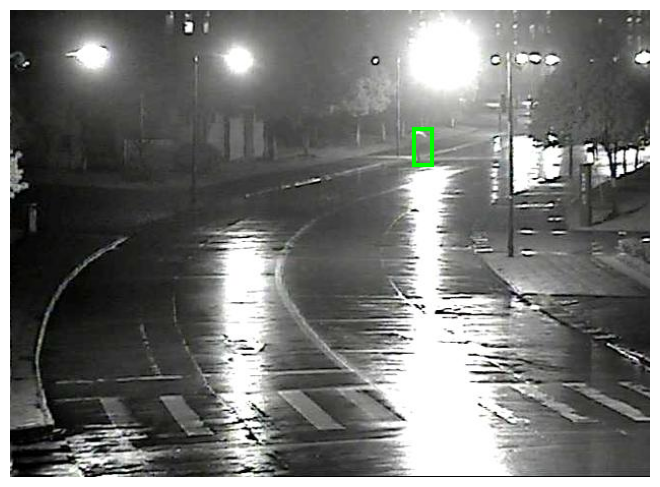

Tracking all frames in the sequence:  27%|██▋       | 47/177 [00:01<00:04, 31.11it/s]

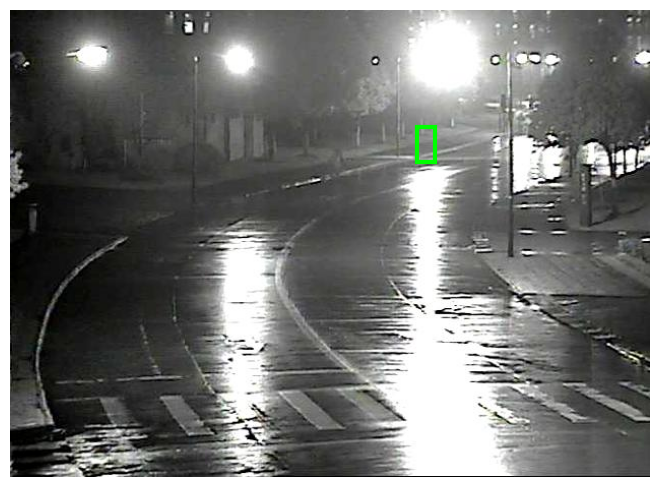

Tracking all frames in the sequence:  55%|█████▌    | 98/177 [00:03<00:02, 30.51it/s]

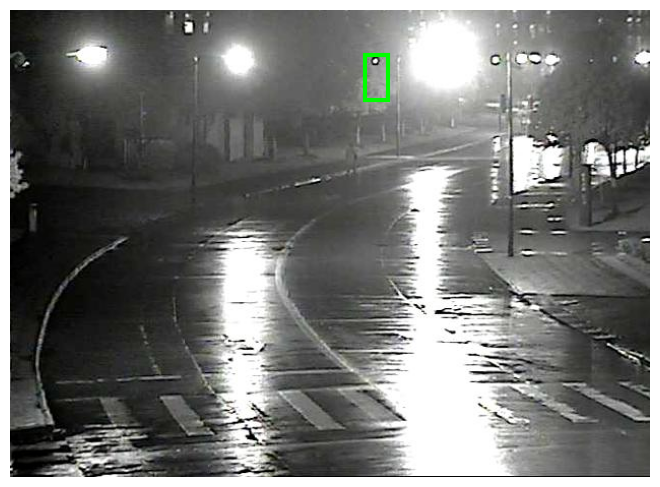

Tracking all frames in the sequence:  85%|████████▍ | 150/177 [00:05<00:01, 25.06it/s]

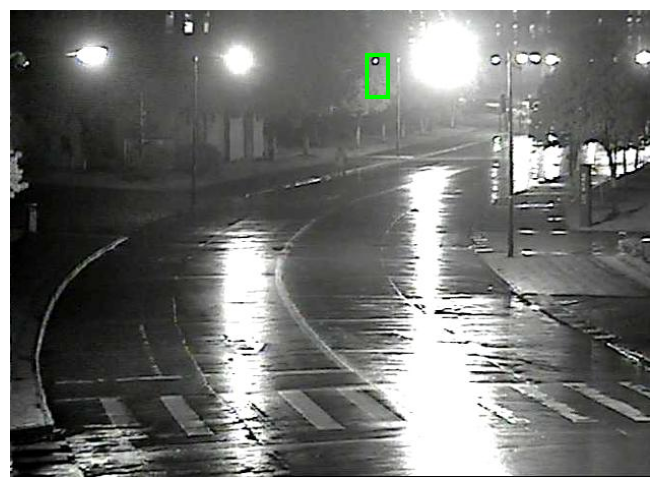

Tracking all frames in the sequence: 100%|██████████| 177/177 [00:07<00:00, 24.63it/s]

Success Rate of the tracker on this sequence:  0.22598870056497175


<Figure size 640x480 with 0 Axes>

In [33]:
def load_sequence(seq_path):
    """
    load sequences;
    sequences should be in OTB format, or you can custom this function by yourself

    NOTE: target_position, target_sz are derived from first bbox info from Infrared.txt

    """
    # given the sequence path, you need to load sequence information, including
    # rgb_img_list: a list, each element of which is the path for an image from visible spectrum
    # t_img_list: a list, each element of which is the path for an image from thermal spectrum
    # target_position: an array, the center position of the target [center_y, center_x]
    # target_sz: an array, the height and width of the target [h, w]
    # gt: an array, of bounding box informations for each frame of the video sequence in format [(top_left_x, top_left_y, width, height), ...]
    # NOTE: the sequence folder contains a two sub-folders (visible and infrared) that contains all image files,
    # and a 'infrared.txt' that contains the initial groundtruth of the target in format (top_left_x, top_left_y, width, height)

    ##########--WRITE YOUR CODE HERE --##########
    rgb_folder = os.path.join(seq_path, 'visible')
    infrared_folder = os.path.join(seq_path, 'infrared')
    infrared_txt_path = os.path.join(seq_path, 'infrared.txt')

    with open(infrared_txt_path, 'r') as f:
        first_line = f.readline().strip().split(',')
        target_position = np.array([float(first_line[1]) + float(first_line[3]) / 2, float(first_line[0]) + float(first_line[2]) / 2])
        target_sz = np.array([float(first_line[3]), float(first_line[2])])
        gt = [[float(val) for val in line.strip().split(',')] for line in f]

    rgb_img_list = [os.path.join(rgb_folder, f) for f in os.listdir(rgb_folder) if f.endswith('.jpg')]
    t_img_list = [os.path.join(infrared_folder, f) for f in os.listdir(infrared_folder) if f.endswith('.jpg')]
    ##########-------END OF CODE-------##########
    return rgb_img_list, t_img_list, target_position, target_sz, gt #CODE_CHANGE


def evaluate_success_rate(tracker_result, ground_truth, threshold=0.3):
    """
    Success rate metric
    """
    # tracker_result: an array of tracked object's bbox info
    # ground_truth: an array of tracked object's ground truth bbox info
    # threshold: a bbox is considered 'suscessfully tracking' if its iou w/
    # groundtruth is higher than this threshold

    def iou(bbox1, bbox2):
        l1, l2 = bbox1[1], bbox2[1]
        r1, r2 = bbox1[1]+bbox1[3], bbox2[1]+bbox2[3]
        u1, u2 = bbox1[0], bbox2[0]
        b1, b2 = bbox1[0]+bbox1[2], bbox2[0]+bbox2[2]
        # compute the Intersection Rectangle's left, right, up, bottom positions
        l, r, u, b = max(l1, l2), min(r1, r2), max(u1, u2), min(b1, b2)
        h, w = max(0, b-u), max(0, r-l)
        # compute iou
        return h*w/( bbox1[3]*bbox1[2] + bbox2[3]*bbox2[2] - h*w )

    total_frames = len(tracker_result)
    success_frames = 0
    for i in range(total_frames):
        _iou = iou(tracker_result[i], ground_truth[i])
        success_frames = success_frames + (_iou>threshold)
    return success_frames/total_frames

if __name__ == "__main__":

    # load sequence
    img_list, _, target_position, target_size, gt = load_sequence('RGB-T234/rainingwaliking')
    img_list, _, target_position, target_size, gt = img_list, _, target_position, target_size, gt
    # run tracker
    results = run_tracker(img_list, target_position, target_size, save_to_file='./Tracking_Result_RGB.txt')
    # find average IOU of the tracking result
    print("Success Rate of the tracker on this sequence: ", evaluate_success_rate(results, gt))



##2.2 Using Thermal images to improve the performance

(10 points) In the above problem we have tried to track the man walking with an umberlla.
In this video [RGB-T234/rainingwalking](https://drive.google.com/file/d/1LweAwT4hikySCIjtlsEi3BS0jfoU9iNn/view), although we humans are able to see him and track him, the SiamFC tracker was not able to do that(given its success rate in above section is very less (<30%)). We could solve this by designing a model that is sensitive to even such inadequate visual cues. But this is a problem that needs carefull design.   

So, another way to fix this is by gathering more information (rather than trying to understand limited data). We can capture the environment in infrared spectrum and perceive how different objects radiate heat. This extra data can be read as a new channel alongside RGB channels in each image and can potentially improve our tracking.


In the below code, we will use a second siamese extraction branch to extract features from thermal images and fuse them with the features from RGB images. This fusion helps encode both visual and thermal cues into the feature maps and thus lead to more accurate/sensitive response map.

You can expect a success rate around 80% or even more from this implementation.


Tracking all frames in the sequence:   0%|          | 0/177 [00:00<?, ?it/s]

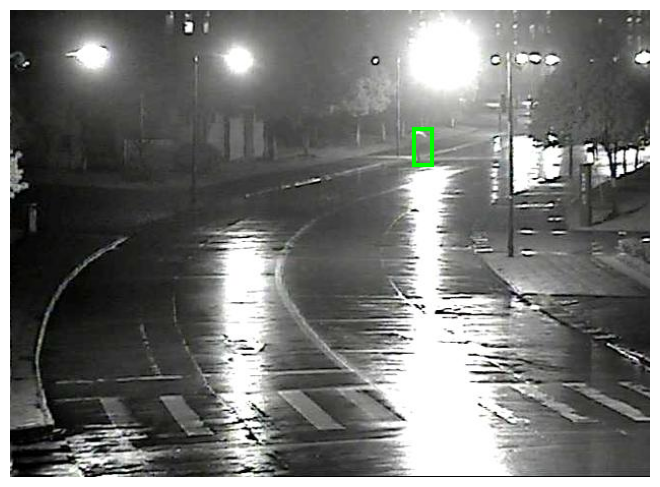

Tracking all frames in the sequence:  28%|██▊       | 50/177 [00:03<00:07, 17.82it/s]

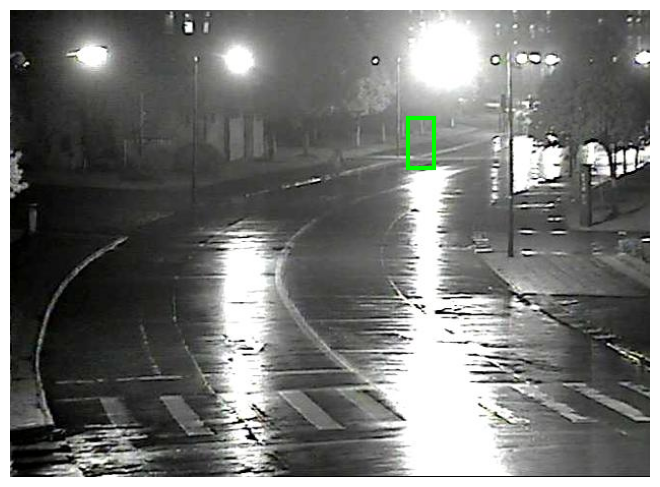

Tracking all frames in the sequence:  56%|█████▋    | 100/177 [00:06<00:04, 15.82it/s]

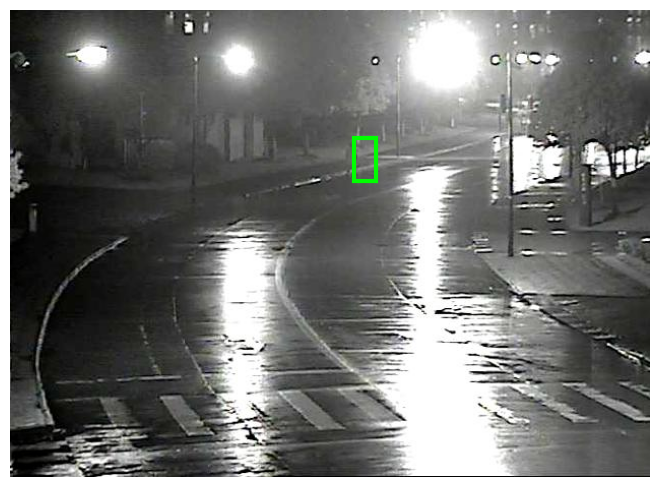

Tracking all frames in the sequence:  85%|████████▍ | 150/177 [00:10<00:02, 13.38it/s]

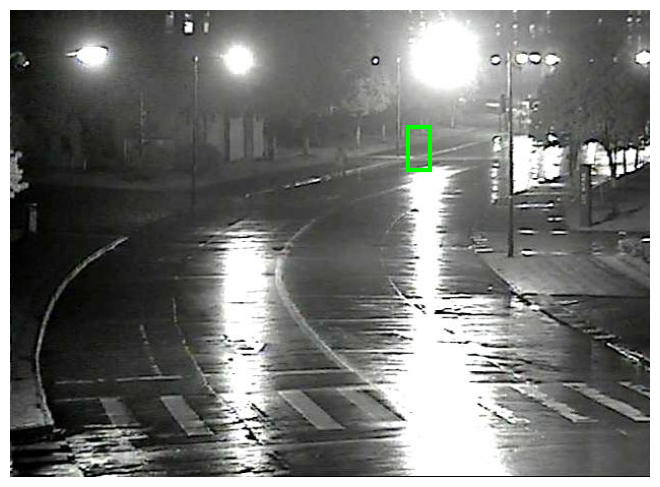

Tracking all frames in the sequence: 100%|██████████| 177/177 [00:12<00:00, 14.19it/s]



Success Rate of the tracker on this sequence:  0.21468926553672316


<Figure size 640x480 with 0 Axes>

In [36]:
def fuse_features(feat1_tensor, feat2_tensor):
    "fuse the network features"
    # feat1_tensor: feature of RGB channel image
    # feat2_tensor: feature of Thermal channel image

    # since you use the same network on similarly shaped input images,
    # the features of RGB and T images will have same shape
    assert feat1_tensor.shape==feat2_tensor.shape
    # You can experiment with multiple ways of feature fusion and
    # submit with whatever approch worked better
    ##########--WRITE YOUR CODE HERE --##########
    return torch.cat((feat1_tensor, feat2_tensor), dim=1)
    ##########-------END OF CODE-------##########


def run_tracker(fuse_features_method):

    # get the default parameters
    p = Config()

    # load model
    net = torch.load('./SiamFCMModel.pth')
    net = net.to(device)

    # evaluation mode
    net.eval()

    # load sequences
    rgb_img_list, t_img_list, target_position, target_size, gt = load_sequence('./RGB-T234/rainingwaliking')

    # first frame (Visual + Thermal)
    rgb_img_uint8 = cv2.imread(rgb_img_list[0])
    rgb_img_uint8 = cv2.cvtColor(rgb_img_uint8, cv2.COLOR_BGR2RGB)
    rgb_img_double = np.double(rgb_img_uint8)  # uint8 to float

    t_img_uint8 = cv2.imread(t_img_list[0])
    t_img_double = np.double(t_img_uint8)

    # compute avg for padding
    rgb_avg_chans = np.mean(rgb_img_double, axis=(0, 1))
    t_avg_chans = np.mean(t_img_double, axis=(0, 1))

    wc_z = target_size[1] + p.context_amount * sum(target_size)
    hc_z = target_size[0] + p.context_amount * sum(target_size)
    s_z = np.sqrt(wc_z * hc_z)
    scale_z = p.examplar_size / s_z

    # crop examplar z in the first frame
    rgb_z_crop = get_subwindow_tracking(rgb_img_double, target_position, p.examplar_size, round(s_z), rgb_avg_chans)
    rgb_z_crop = np.uint8(rgb_z_crop)  # you need to convert it to uint8
    # convert image to tensor
    rgb_z_crop_tensor = 255.0 * F.to_tensor(rgb_z_crop).unsqueeze(0)

    t_z_crop = get_subwindow_tracking(t_img_double, target_position, p.examplar_size, round(s_z), t_avg_chans)
    t_z_crop = np.uint8(t_z_crop)
    t_z_crop_tensor = 255.0 * F.to_tensor(t_z_crop).unsqueeze(0)

    # p.instance_size = 400
    d_search = (p.instance_size - p.examplar_size) / 2
    pad = d_search / scale_z
    s_x = s_z + 2 * pad
    # arbitrary scale saturation
    min_s_x = p.scale_min * s_x
    max_s_x = p.scale_max * s_x

    # generate cosine window
    if p.windowing == 'cosine':
        window = np.outer(np.hanning(p.score_size * p.response_UP), np.hanning(p.score_size * p.response_UP))
    elif p.windowing == 'uniform':
        window = np.ones((p.score_size * p.response_UP, p.score_size * p.response_UP))
    window = window / sum(sum(window))

    # pyramid scale search
    scales = p.scale_step ** np.linspace(-np.ceil(p.num_scale / 2), np.ceil(p.num_scale / 2), p.num_scale)
    # extract feature for examplar z
    rgb_z_features = net.feat_extraction(Variable(rgb_z_crop_tensor).to(device))
    t_z_features = net.feat_extraction(Variable(t_z_crop_tensor).to(device))
    z_features = fuse_features_method(rgb_z_features, t_z_features)
    z_features = z_features.repeat(p.num_scale, 1, 1, 1)

    # do tracking
    bboxes = np.zeros((len(rgb_img_list), 4), dtype=np.double)  # save tracking result
    for i in tqdm(range(0, len(rgb_img_list)), desc="Tracking all frames in the sequence"):
        # print('processing frame %d (%s) ...' %(i+1, rgb_img_list[i]))
        if i > 0:
            # do detection
            # currently, we only consider RGB images for tracking
            rgb_img_uint8 = cv2.imread(rgb_img_list[i])
            t_img_uint8 = cv2.imread(t_img_list[i])
            rgb_img_uint8 = cv2.cvtColor(rgb_img_uint8, cv2.COLOR_BGR2RGB)
            rgb_img_double = np.double(rgb_img_uint8)  # uint8 to float
            t_img_double = np.double(t_img_uint8)

            scaled_instance = s_x * scales
            scaled_target = np.zeros((2, scales.size), dtype=np.double)
            scaled_target[0, :] = target_size[0] * scales
            scaled_target[1, :] = target_size[1] * scales

            # extract scaled crops for search region x at previous target position
            rgb_x_crops = make_scale_pyramid(rgb_img_double, target_position, scaled_instance, p.instance_size, rgb_avg_chans, p)
            # repeat the above same for current thermal frame
            t_x_crops = make_scale_pyramid(t_img_double, target_position, scaled_instance, p.instance_size, t_avg_chans, p)

            # get features of search regions
            rgb_x_crops_tensor = torch.FloatTensor(rgb_x_crops.shape[3], rgb_x_crops.shape[2], rgb_x_crops.shape[1], rgb_x_crops.shape[0])
            t_x_crops_tensor = torch.FloatTensor(rgb_x_crops.shape[3], rgb_x_crops.shape[2], rgb_x_crops.shape[1], rgb_x_crops.shape[0])

            for k in range(rgb_x_crops.shape[3]):
                tmp_x_crop = np.uint8(rgb_x_crops[:, :, :, k])
                # numpy array to tensor
                rgb_x_crops_tensor[k, :, :, :] = 255.0 * F.to_tensor(tmp_x_crop).unsqueeze(0)
                # repeat for t frame
                tmp_x_crop = np.uint8(t_x_crops[:, :, :, k])
                t_x_crops_tensor[k, :, :, :] = 255.0 * F.to_tensor(tmp_x_crop).unsqueeze(0)


            # get features of search regions;
            # the input to the network branches are rgb_x_crop_tensors and t_x_crops_tensor;
            # the feature of search regions is represented using 'x_features'
            # use the fuse_features_method() method that you have implemented to fuse the features output by network branches
            # NOTE: For simplicity you can use the same siamese network to extract features of thrermal channels
            ##########--WRITE YOUR CODE HERE -##########
            rgb_x_features = net.feat_extraction(Variable(rgb_x_crops_tensor).to(device))
            t_x_features = net.feat_extraction(Variable(t_x_crops_tensor).to(device))
            x_features = fuse_features_method(rgb_x_features, t_x_features)
            ##########-------END OF CODE-------##########

            # evaluate the offline-trained network for exemplar x features
            target_position, new_scale = tracker_eval(net, round(s_x), z_features, x_features, target_position, window,
                                                      p)
            # scale damping and saturation
            s_x = max(min_s_x, min(max_s_x, (1 - p.scale_LR) * s_x + p.scale_LR * scaled_instance[int(new_scale)]))
            target_size = (1 - p.scale_LR) * target_size + p.scale_LR * np.array(
                [scaled_target[0, int(new_scale)], scaled_target[1, int(new_scale)]])

        rect_position = np.array(
            [target_position[1] - target_size[1] / 2, target_position[0] - target_size[0] / 2, target_size[1],
             target_size[0]])

        # visualize the tracking results
        # comment for not visualizing
        if i % 50 == 0:
            visualize_tracking_result(rgb_img_uint8, rect_position, 1)

        # output bbox in the original frame coordinates
        o_target_position = target_position
        o_target_size = target_size
        bboxes[i, :] = np.array(
            [o_target_position[1] - o_target_size[1] / 2, o_target_position[0] - o_target_size[0] / 2, o_target_size[1],
             o_target_size[0]])
    # save tracking results
    np.savetxt('./Tracking_Result_RGBT.txt', bboxes, fmt='%.3f')
    print('\n')
    print("Success Rate of the tracker on this sequence: ", evaluate_success_rate(bboxes, gt))


run_tracker(fuse_features)

## Submission guidelines
---
Plagiarism: plagiarism is strictly forbidden.   
Note: Please be advised that uploading your homework assignments to public platforms, such as GitHub, is STRICTLY PROHIBITED. Sharing your homework solutions in this manner (even after the course completion) constitutes a violation of academic integrity and will be treated as such.


### Overall submission

Before preparing the zip fot BrightSpace submision, you will create _drive_url.txt_. This file will contain the Google drive URL `https://drive.google.com/drive/folders/FOLDER_ID?usp=drive_link` for the root working directory.
Permit the grading TA to access the folder: **kgarigapati@cs.stonybrook.edu**

Note: datasets or learned weights (except heads.pth) should not be a part of brightspace submission.  

Please remove SiamFCVideo/ and RGB-T234/

This zip file should include the below mentioned files in the same folder structure:
```
{last name}_{first name}_{sbu id}_hw2/
├── part1/
│   ├── Tracking_Result.txt
│   ├── Tracking_Result_RGBT.txt
│   └── CSE527-23F-HW4-P1.ipynb
├── part2/
│   ├── CSE527-23F-HW4-P2.ipynb
│   └── stitched.png
└── drive_url.txt
```


Other Notes:  
Colab has a good feature of version control, you should take advantage of this to save your work properly. However, the timestamp of the submission made in brightspace is the only one that we consider for grading. To be more specific, we will only grade the version of your code right before the timestamp of the submission made in brightspace.

You are encouraged to post and answer questions on Piazza. Based on the amount of email that we have received in past years, there might be dealys in replying to personal emails. Please ask questions on Piazza and send emails only for personal issues.

**Late submission penalty:** <br>
There will be a 10% penalty per day for late submission. However, you will have 3 days throughout the whole semester to submit late without penalty. Note that the grace period is calculated by days instead of hours. If you submit the homework one minute after the deadline, one late day will be counted. Likewise, if you submit one minute after the deadline, the 10% penaly will be imposed if not using the grace period.